In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
drive_path = '/content/drive/MyDrive/general_assembly/code/capstone/arabic_characters'

In [3]:
import pickle

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.regularizers import l2

np.random.seed(42)

In [4]:
with open(drive_path + '/arabcharsrgb.pkl', 'rb') as f:
    ac_data = pickle.load(f)

In [5]:
train_imgs = ac_data[0].copy()
test_imgs = ac_data[1].copy()
train_labels = ac_data[2].copy()
test_labels = ac_data[3].copy()
X_train = ac_data[4].copy()
X_test = ac_data[5].copy()
y_train = ac_data[6].copy()
y_test = ac_data[7].copy()
class_dict = ac_data[8].copy()

## CNN Model #1
This is the model proposed in the paper outlining the data set by the people who collected the data [(source)](https://www.researchgate.net/publication/313891953_Arabic_Handwritten_Characters_Recognition_using_Convolutional_Neural_Network). The grid searching method used was originally published [here](https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/).

In [6]:
def gridsearch_l2reg(l2_values, data = (X_train, X_test, y_train, y_test), batch = 256, eps = 30, v = 0):
    count = 0
    loss_scores = []
    accuracy_scores = []

    for value in l2_values:
        print(f'Fitting model with l2 = {value:.0e}...')
        # construct network
        model = Sequential()

        # Convolutional and Max Pooling - layers 1 & 2
        model.add(Conv2D(80, (5, 5), activation='relu',
                         kernel_regularizer=l2(value), input_shape=(32, 32, 3)))
        model.add(MaxPooling2D((2, 2)))

        # Convolutional and Max Pooling - layers 3 & 4
        model.add(Conv2D(64, (5, 5), activation='relu',
                         kernel_regularizer=l2(value)))
        model.add(MaxPooling2D((2, 2)))

        # classification - layers 5 & 6
        model.add(Flatten())
        model.add(Dense(1024, activation='relu', kernel_regularizer=l2(value)))
        model.add(Dense(28, activation='softmax'))

        # compile model
        model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        # fit model
        history = model.fit(data[0], data[2], validation_data=(data[1], data[3]),
                            batch_size=batch, epochs=eps, verbose = v)

        # evaluate model
        loss_scores.append(model.evaluate(X_test, y_test, verbose=0)[0])
        accuracy_scores.append(model.evaluate(X_test, y_test, verbose=0)[1])

        # dynamically name and save models
        model.save(f'{drive_path}/models/cnn_l2reg_{count}.h5')
        count += 1

    # visualize model performance for each value of l2
    print(f'\n')
    plt.figure(figsize=(8,6))
    plt.semilogx(l2_values, loss_scores, label='Loss Scores', marker='o')
    plt.semilogx(l2_values, accuracy_scores, label='Accuracy Scores', marker='o')
    plt.xlabel('l2 Values', fontsize=16)
    plt.xticks(fontsize=14)
    plt.ylabel('Scores', fontsize=16)
    plt.yticks(fontsize=14)
    plt.title('Loss and Accuracy Scores for Different\n l2 Regularization Values in this CNN', fontsize=16)
    plt.legend(fontsize=14)
    plt.show()

    print(f'\n')
    print(pd.DataFrame({'l2 Value': l2_values,
                        'Loss Score': loss_scores,
                        'Accuracy Score': accuracy_scores}))

    return

Fitting model with l2 = 1e-01...
Fitting model with l2 = 1e-02...
Fitting model with l2 = 1e-03...
Fitting model with l2 = 1e-04...
Fitting model with l2 = 1e-05...
Fitting model with l2 = 1e-06...
Fitting model with l2 = 1e-07...
Fitting model with l2 = 1e-08...




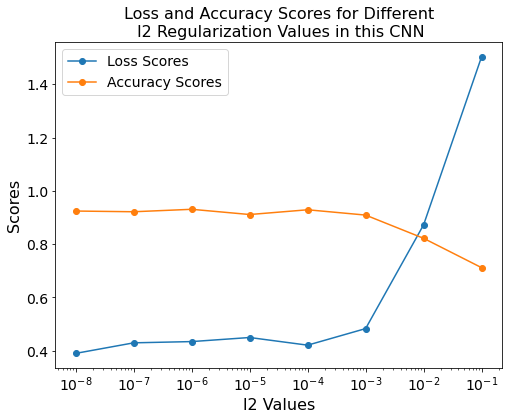



       l2 Value  Loss Score  Accuracy Score
0  1.000000e-01    1.503185        0.711905
1  1.000000e-02    0.872633        0.822024
2  1.000000e-03    0.483074        0.909226
3  1.000000e-04    0.420901        0.929167
4  1.000000e-05    0.449650        0.911310
5  1.000000e-06    0.434332        0.930952
6  1.000000e-07    0.429666        0.921726
7  1.000000e-08    0.390084        0.924405
CPU times: user 11h 2min 21s, sys: 51min 10s, total: 11h 53min 31s
Wall time: 28min 40s


In [7]:
%%time
# This ran w/ TPU on Colab Pro+ in High RAM mode
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]
gridsearch_l2reg(values)

The scores seemed to be getting better so we're gonna pick up where we left off.

In [8]:
def gridsearch_l2reg8(l2_values, data = (X_train, X_test, y_train, y_test), batch = 256, eps = 30, v = 0):
    count = 8 #this is the only thing that's different
    loss_scores = []
    accuracy_scores = []

    for value in l2_values:
        print(f'Fitting model with l2 = {value:.0e}...')
        # construct network
        model = Sequential()

        # Convolutional and Max Pooling - layers 1 & 2
        model.add(Conv2D(80, (5, 5), activation='relu',
                         kernel_regularizer=l2(value), input_shape=(32, 32, 3)))
        model.add(MaxPooling2D((2, 2)))

        # Convolutional and Max Pooling - layers 3 & 4
        model.add(Conv2D(64, (5, 5), activation='relu',
                         kernel_regularizer=l2(value)))
        model.add(MaxPooling2D((2, 2)))

        # classification - layers 5 & 6
        model.add(Flatten())
        model.add(Dense(1024, activation='relu', kernel_regularizer=l2(value)))
        model.add(Dense(28, activation='softmax'))

        # compile model
        model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        # fit model
        history = model.fit(data[0], data[2], validation_data=(data[1], data[3]),
                            batch_size=batch, epochs=eps, verbose = v)

        # evaluate model
        loss_scores.append(model.evaluate(X_test, y_test, verbose=0)[0])
        accuracy_scores.append(model.evaluate(X_test, y_test, verbose=0)[1])

        # dynamically name and save models
        model.save(f'{drive_path}/models/cnn_l2reg_{count}.h5')
        count += 1

    # visualize model performance for each value of l2
    print(f'\n')
    plt.figure(figsize=(8,6))
    plt.semilogx(l2_values, loss_scores, label='Loss Scores', marker='o')
    plt.semilogx(l2_values, accuracy_scores, label='Accuracy Scores', marker='o')
    plt.xlabel('l2 Values', fontsize=16)
    plt.xticks(fontsize=14)
    plt.ylabel('Scores', fontsize=16)
    plt.yticks(fontsize=14)
    plt.title('Loss and Accuracy Scores for Different\n l2 Regularization Values in this CNN', fontsize=16)
    plt.legend(fontsize=14)
    plt.show()

    print(f'\n')
    print(pd.DataFrame({'l2 Value': l2_values,
                        'Loss Score': loss_scores,
                        'Accuracy Score': accuracy_scores}))

    return

Fitting model with l2 = 1e-09...
Fitting model with l2 = 1e-10...
Fitting model with l2 = 1e-11...
Fitting model with l2 = 1e-12...




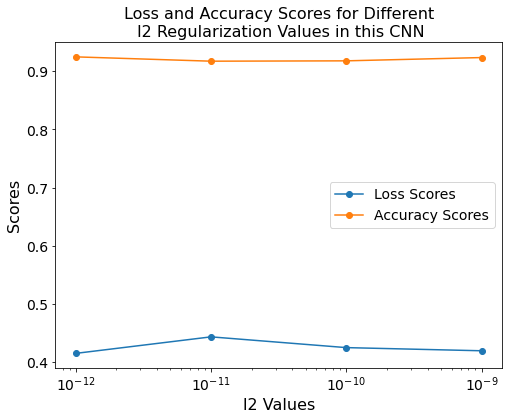



       l2 Value  Loss Score  Accuracy Score
0  1.000000e-09    0.419198        0.923810
1  1.000000e-10    0.424631        0.918155
2  1.000000e-11    0.443142        0.917560
3  1.000000e-12    0.414719        0.925000
CPU times: user 4h 1min 46s, sys: 9min 25s, total: 4h 11min 12s
Wall time: 9min 55s


In [9]:
%%time
# This ran w/ TPU on Colab Pro+ in High RAM mode
values = [1e-9, 1e-10, 1e-11, 1e-12]
gridsearch_l2reg8(values)

In [26]:
cnn_1 = load_model(f'{drive_path}/models/cnn_l2reg_0.h5')
cnn_2 = load_model(f'{drive_path}/models/cnn_l2reg_1.h5')
cnn_3 = load_model(f'{drive_path}/models/cnn_l2reg_2.h5')
cnn_4 = load_model(f'{drive_path}/models/cnn_l2reg_3.h5')
cnn_5 = load_model(f'{drive_path}/models/cnn_l2reg_4.h5')
cnn_6 = load_model(f'{drive_path}/models/cnn_l2reg_5.h5')
cnn_7 = load_model(f'{drive_path}/models/cnn_l2reg_6.h5')
cnn_8 = load_model(f'{drive_path}/models/cnn_l2reg_7.h5')
cnn_9 = load_model(f'{drive_path}/models/cnn_l2reg_8.h5')
cnn_10 = load_model(f'{drive_path}/models/cnn_l2reg_9.h5')
cnn_11 = load_model(f'{drive_path}/models/cnn_l2reg_10.h5')
cnn_12 = load_model(f'{drive_path}/models/cnn_l2reg_11.h5')

In [27]:
cnn_list = [cnn_1, cnn_2, cnn_3, cnn_4, cnn_5, cnn_6, cnn_7, cnn_8, cnn_9, cnn_10, cnn_11, cnn_12]
l2_values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12]

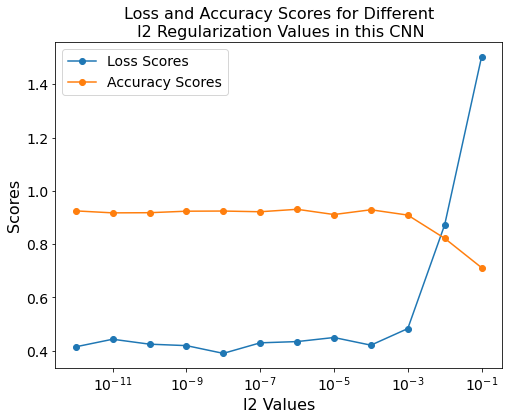



        l2 Value  Loss Score  Accuracy Score
0   1.000000e-01    1.503185        0.711905
1   1.000000e-02    0.872633        0.822024
2   1.000000e-03    0.483074        0.909226
3   1.000000e-04    0.420901        0.929167
4   1.000000e-05    0.449650        0.911310
5   1.000000e-06    0.434332        0.930952
6   1.000000e-07    0.429666        0.921726
7   1.000000e-08    0.390084        0.924405
8   1.000000e-09    0.419198        0.923810
9   1.000000e-10    0.424631        0.918155
10  1.000000e-11    0.443142        0.917560
11  1.000000e-12    0.414719        0.925000


In [28]:
loss_scores = []
accuracy_scores = []

for cnn in cnn_list:
    loss_scores.append(cnn.evaluate(X_test, y_test, verbose=0)[0])
    accuracy_scores.append(cnn.evaluate(X_test, y_test, verbose=0)[1])

plt.figure(figsize=(8,6))
plt.semilogx(l2_values, loss_scores, label='Loss Scores', marker='o')
plt.semilogx(l2_values, accuracy_scores, label='Accuracy Scores', marker='o')
plt.xlabel('l2 Values', fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel('Scores', fontsize=16)
plt.yticks(fontsize=14)
plt.title('Loss and Accuracy Scores for Different\n l2 Regularization Values in this CNN', fontsize=16)
plt.legend(fontsize=14)
plt.show()

print(f'\n')
print(pd.DataFrame({'l2 Value': l2_values,
                    'Loss Score': loss_scores,
                    'Accuracy Score': accuracy_scores}))

In [29]:
cnn_8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 80)        6080      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 80)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 64)        128064    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              1639424   
_________________________________________________________________
dense_15 (Dense)             (None, 28)               

In [30]:
cnn_8.evaluate(X_test, y_test)

105/105 [==============================] - 1s 7ms/step - loss: 0.3901 - accuracy: 0.9244


[0.39008384943008423, 0.9244047403335571]

In [32]:
cnn_8.save(drive_path + '/models/cnn_1.h5')

## Model Performance
Based on the information above, we're going to choose a model with $l_2 =$ `1e-8` because it had the lowest test score (0.3901, a massive improvement over the baseline's 0.8514) and close to the highest accuracy score (92.44%). Although, it seems that any of the values less than or equal to `1e-3` would work comparably well due to the variance produced within this stochastically generated method.